Q1)
For matrix mutliplication we multiply each row of matrix 1(n×k) with each column of matrix 2(k×m) and at every row column multiplication we add the multiplied values.
This means we multiply n rows of matrix 1 with m columns, in every row of matrix 1 and every column of matrix 2 there are k elements and in every row column multiplication k multiplications happens and k-1 additions happens. There are (n×m) row column multiplications happens this implies total number of multiplications and additions happens in matrix multiplications are n×m×k and n×m×(k-1) respectively.


Q2)

In [ ]:
import numpy as np
import time as time
# matrix 1
mat_1=[[1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]]
# matrix 2
mat_2=[[7, 8,10],
    [9, 10,11],
    [11, 12,13]]

print('Matrix 1:',mat_1)
print('Matrix 2:',mat_2)


Matrix 1: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
Matrix 2: [[7, 8, 10], [9, 10, 11], [11, 12, 13]]


In [ ]:
# By using list of lists
def matrix_mul(mat_1,mat_2):
  n=len(mat_1)
  m=len(mat_2[0])
  if(len(mat_1[0]) == len(mat_2)):
      l=len(mat_1[0])

  else:
    print("Invalid input")
    return -1
  matrix=[]
  for i in range(n):
    lis=[]
    for j in range(m):
      sum=0
      for k in range(l):
        sum+=mat_1[i][k]*mat_2[k][j]
      lis.append(int(sum))
    matrix.append(lis)
  return matrix
start=time.time()
mat=matrix_mul(mat_1,mat_2)
end=time.time()
print(mat)
print('Run time:',end-start)

[[58, 64, 71], [139, 154, 173], [220, 244, 275]]
Run time: 0.00011587142944335938


In [ ]:
# by using numpy
mat_1=np.array(mat_1)
mat_2=np.array(mat_2)
start=time.time()
mat=np.dot(mat_1,mat_2)
end=time.time()
print(mat)
print('Run time:',end-start)

[[ 58  64  71]
 [139 154 173]
 [220 244 275]]
Run time: 9.393692016601562e-05


here we can see numpy inbuilt numpy function takes less time than our code. becuase numpy inbuild functions are implemented in c language which is more faster than python.

Q3)

In [207]:
# finding midian of list
#approch 1
import numpy as np
import time as time
def find_median(lis):
  temp=lis.copy()
  n=len(temp)
  for i in range(n//2):
    max_=temp[0]
    for j in temp:
      if(j>max_):
        max_=j
    temp.remove(max_)

  if(n%2):
    max_1=temp[0]
    for j in temp:
      if(j>max_1):
        max_1=j
    return max_1
  else:
    max2=temp[0]
    for j in temp:
      if(j>max2):
        max2=j
    return (max_+max2)/2
#above function has time complaxcity of O(n^2)


lis = [45, 12, 78, 34, 23, 67, 89, 10, 56, 90, 32, 18, 76, 29, 61, 84]
start=time.time()
ans=find_median(lis)
end=time.time()
print('median:',ans)
print('time taken:',end-start)

median: 50.5
time taken: 0.0014142990112304688


In [210]:
# approch 2(optimised by using sorting)
def find_median_2(lis):
  lis.sort()
  if(len(lis)%2):
    return lis[len(lis)//2]
  else:
    return (lis[len(lis)//2]+lis[(len(lis)//2)-1])/2
#above function has time complaxcity of O(nlogn) so this is better method than previous one
start=time.time()
ans=find_median_2(lis)
end=time.time()
print("median",ans)
print('time taken:',end-start)

median 50.5
time taken: 0.001085042953491211


In [208]:
# using np.median, np.median also has time complaxcity of O(nlogn)
#approch 3 (inbuild numpy function)
lis=np.array(lis)
start=time.time()
ans=np.median(lis)
end=time.time()
print('median:',ans)
print('time taken:',end-start)

median: 50.5
time taken: 0.000782012939453125


so here we can see our optimised method take mininum time than approch 1 and the approch 1 take heighest time among all methods.
the inbuilt numpy function takes less time than both approch 1 and approch 2.
becuase internally it's implemented in c language.

Q4)

gradient of function $f(x, y) = x^2 y + y^3 \sin(x)$
 with respect to x,y respectively is:

$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$


Q5)

In [ ]:
import jax
import jax.numpy as jnp
from jax import grad
import numpy as np

def f(x,y):
  return (((x**2)*y) + ((y**3)*jnp.sin(x)))
gradient_f_x=grad(f,argnums=0)
gradient_f_y=grad(f,argnums=1)
def grad_f(x,y):
  fx=(2*x*y) + (y**3)*np.cos(x)
  fy=(x**2) + (3*(y**2))*np.sin(x)
  return np.array([fx,fy])
for i in range(5):
    x = np.random.uniform(-5, 5)
    y = np.random.uniform(-5, 5)

    grad_jax = np.array([gradient_f_x(x,y),gradient_f_y(x,y)])
    grad_exact = grad_f(x, y)

    print(f"x = {x:.4f}, y = {y:.4f}")
    print(f"JAX gradient     = [{grad_jax[0]:.4f}, {grad_jax[1]:.4f}]")
    print(f"Analytical grad  = [{grad_exact[0]:.4f}, {grad_exact[1]:.4f}]")
    print(f"Difference       = [{abs(grad_jax[0] - grad_exact[0]):.4f}, {abs(grad_jax[1] - grad_exact[1]):.4f}]\n")

x = 2.0395, y = 3.2710
JAX gradient     = [-2.4681, 32.7952]
Analytical grad  = [-2.4681, 32.7952]
Difference       = [0.0000, 0.0000]

x = 1.9116, y = 3.3589
JAX gradient     = [0.1760, 35.5536]
Analytical grad  = [0.1760, 35.5536]
Difference       = [0.0000, 0.0000]

x = 3.3746, y = 0.3159
JAX gradient     = [2.1017, 11.3191]
Analytical grad  = [2.1017, 11.3191]
Difference       = [0.0000, 0.0000]

x = 3.2558, y = 0.7567
JAX gradient     = [4.4967, 10.4044]
Analytical grad  = [4.4967, 10.4044]
Difference       = [0.0000, 0.0000]

x = -4.5824, y = 4.6537
JAX gradient     = [-55.7145, 85.4207]
Analytical grad  = [-55.7144, 85.4207]
Difference       = [0.0000, 0.0000]



Q6)

In [ ]:
import sympy as sp
x,y=sp.symbols('x y')
f=x**2 * y + y**3 * sp.sin(x)
grad_x=sp.diff(f,x)
grad_y=sp.diff(f,y)
print('del(f)/del(x):',grad_x)
print('del(f)/del(y):',grad_y)

del(f)/del(x): 2*x*y + y**3*cos(x)
del(f)/del(y): x**2 + 3*y**2*sin(x)


so here we can see the gardient we got from sympy and we calculated Analyticaly are same

Q7)

In [ ]:
students_data = {
    2022: {
        "Branch 1": {
            "Roll Number":{1: {
                "Name": "Sai",
                "Marks": {"Maths": 100, "English": 70}
            },
            2: {
                "Name": "siddhesh",
                "Marks": {"Maths": 80, "English": 88}
            }}
        },
        "Branch 2": {
            "Roll Number":{1: {
                "Name": "Kushagra",
                "Marks": {"Maths": 72, "English": 82}
            }
        }}
    },
    2023: {
        "Branch 1": {
            "Roll Number": {1:{
                "Name": "Tanuj",
                "Marks": {"Maths": 92, "English": 75}
            }}
        },
        "Branch 2": {
            "Roll Number":{1: {
                "Name": "Mukesh",
                "Marks": {"Maths": 89, "English": 88}
            }}
        }
    },
    2024: {
        "Branch 1": {
            "Roll Number":{1: {
                "Name": "devanshu",
                "Marks": {"Maths": 72, "English": 82}
            }
        }},
        "Branch 2": {
            "Roll Number":{1: {
                "Name": "umang",
                "Marks": {"Maths": 70, "English": 82}
            }
        }}
    },
    2025: {
        "Branch 1": {
            "Roll Number":{1: {
                "Name": "Harsh",
                "Marks": {"Maths": 70, "English": 80}
            }
        }},
        "Branch 2": {
            "Roll Number":{1: {
                "Name": "Vivek",
                "Marks": {"Maths": 100, "English": 100}
            }
        }}
    }
}

Q8)

In [ ]:
class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks
    def print_data(self):
        print('Roll No:',self.roll_no)
        print('Name:',self.name)
        print('Marks:',self.marks)

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students_list =[]# list of students

    def add_student(self, student):
        self.students_list.append(student)
    def print_students(self):
        for i in self.students_list:
            i.print_data()
            print()
class Year:
    def __init__(self, year):
        self.year = int(year)
        self.branches = []  # List of Branch objects

    def add_branch(self, branch):
        self.branches.append(branch)
    def print_branches(self):
        for i in self.branches:
            print(i.branch_name,':\n')
            i.print_students()

class Database:
    def __init__(self):
        self.years =[]#list of years

    def add_year(self, year):
        self.years.append(year)
    def print_years(self):
        for i in self.years:
            print(i.year,':\n')
            i.print_branches()
s1=Student(1,'Sai',{'Maths':100,'English':70})
s2=Student(2,'siddhesh',{'Maths':80,'English':88})
s3=Student(1,'Kushagra',{'Maths':72,'English':82})
s4=Student(1,'Tanuj',{'Maths':92,'English':75})
s5=Student(1,'Mukesh',{'Maths':89,'English':88})
s6=Student(1,'devanshu',{'Maths':72,'English':82})
s7=Student(1,'umang',{'Maths':70,'English':82})
s8=Student(1,'Harsh',{'Maths':70,'English':80})
s9=Student(1,'Vivek',{'Maths':100,'English':100})

b1=Branch('Branch 1')
b1.add_student(s1)
b1.add_student(s2)

b2=Branch('Branch 2')
b2.add_student(s3)

b3=Branch('Branch 1')
b3.add_student(s4)

b4=Branch('Branch 2')
b4.add_student(s5)

b5=Branch('Branch 1')
b5.add_student(s6)

b6=Branch('Branch 2')
b6.add_student(s7)

b7=Branch('Branch 1')
b7.add_student(s8)

b8=Branch('Branch 2')
b8.add_student(s9)

y1=Year(2022)
y1.add_branch(b1)
y1.add_branch(b2)

y2=Year(2023)
y2.add_branch(b3)
y2.add_branch(b4)

y3=Year(2024)
y3.add_branch(b5)
y3.add_branch(b6)

y4=Year(2025)
y4.add_branch(b7)
y4.add_branch(b8)

db=Database()
db.add_year(y1)
db.add_year(y2)
db.add_year(y3)
db.add_year(y4)
db.print_years()

2022 :

Branch 1 :

Roll No: 1
Name: Sai
Marks: {'Maths': 100, 'English': 70}

Roll No: 2
Name: siddhesh
Marks: {'Maths': 80, 'English': 88}

Branch 2 :

Roll No: 1
Name: Kushagra
Marks: {'Maths': 72, 'English': 82}

2023 :

Branch 1 :

Roll No: 1
Name: Tanuj
Marks: {'Maths': 92, 'English': 75}

Branch 2 :

Roll No: 1
Name: Mukesh
Marks: {'Maths': 89, 'English': 88}

2024 :

Branch 1 :

Roll No: 1
Name: devanshu
Marks: {'Maths': 72, 'English': 82}

Branch 2 :

Roll No: 1
Name: umang
Marks: {'Maths': 70, 'English': 82}

2025 :

Branch 1 :

Roll No: 1
Name: Harsh
Marks: {'Maths': 70, 'English': 80}

Branch 2 :

Roll No: 1
Name: Vivek
Marks: {'Maths': 100, 'English': 100}



Q9)

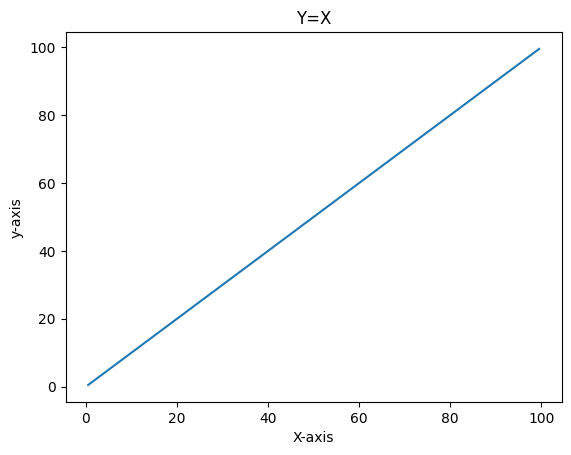

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100,0.5)

# 1 y=x
y=x
plt.plot(x,y)
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title("Y=X")
plt.show()

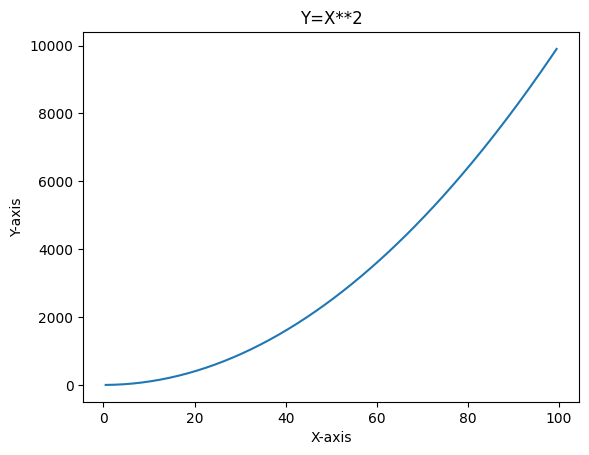

In [ ]:
#2 y=x**2
y=x**2
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=X**2")
plt.plot(x,y)
plt.show()

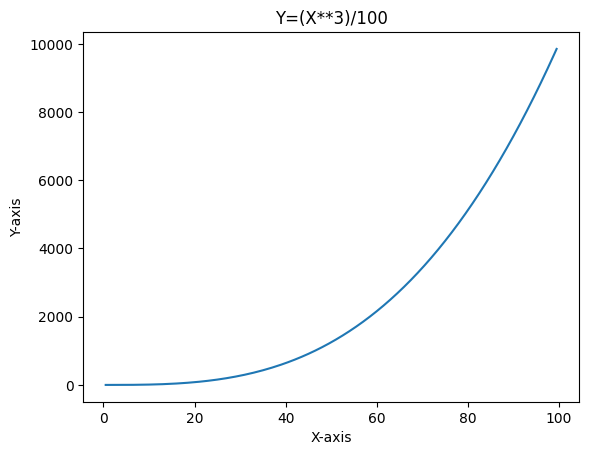

In [ ]:
#3 Y=(X**3)/100
y=(x**3)/100
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=(X**3)/100")
plt.plot(x,y)
plt.show()

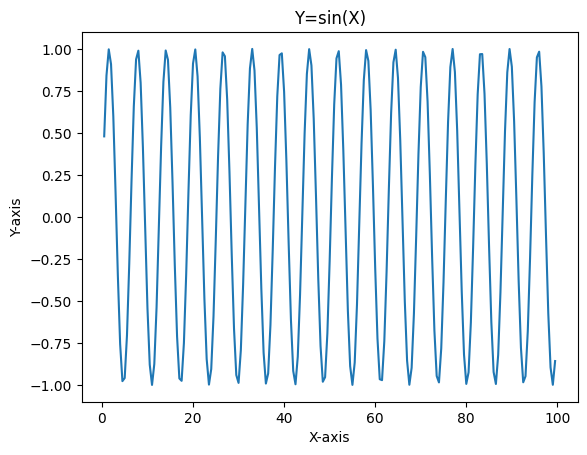

In [ ]:
#4 Y=sin(X)
y=np.sin(x)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=sin(X)")
plt.plot(x,y)
plt.show()

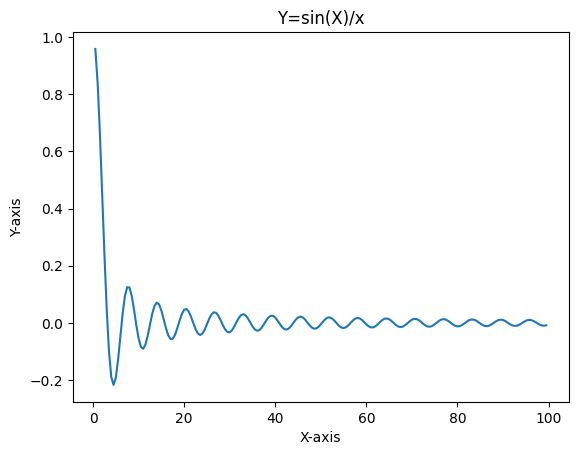

In [ ]:
#5 Y=sin(X)/x
y=np.sin(x)/x
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=sin(X)/x")
plt.plot(x,y)
plt.show()

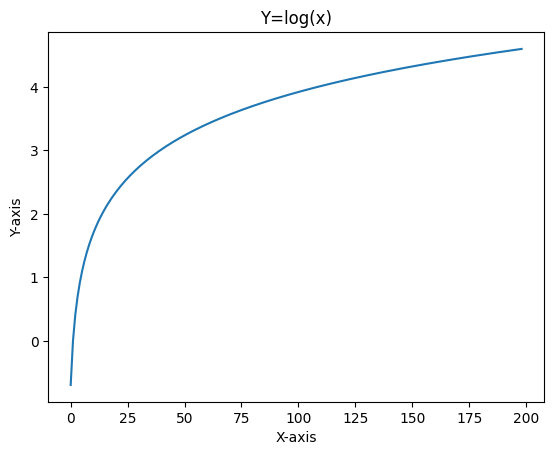

In [ ]:
#6 Y=log(x)
y=np.log(x)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=log(x)")
plt.plot(y)
plt.show()

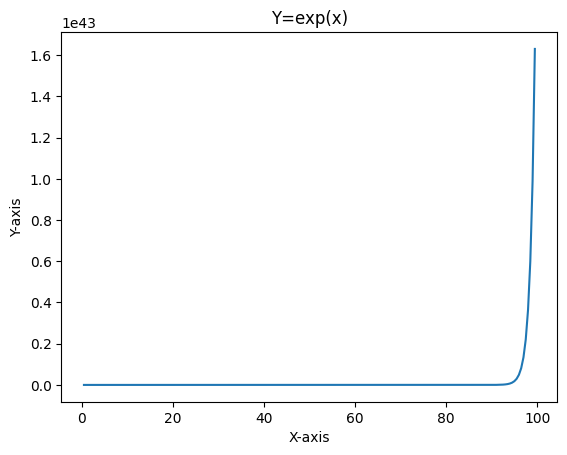

In [ ]:
#7 Y=exp(x)
y=np.exp(x)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=exp(x)")
plt.plot(x,y)
plt.show()

Q10)

In [ ]:
import numpy as np
import pandas as pd

matrix_=np.random.uniform(1,2,size=(20,5))
print(matrix_)
data=pd.DataFrame(matrix_,columns=["a","b","c",
"d","e"])
print(data)

h=data[["a","b","c","d"]].std().idxmax()
print("Column with highest standard deviation:",h)

row_means = data.mean(axis=1)
min_mean_index = row_means.idxmin()
print("Row index with lowest mean:", min_mean_index)


[[1.42186971 1.28723991 1.54241209 1.88850233 1.15141847]
 [1.60309716 1.87678056 1.56519327 1.92742114 1.84174552]
 [1.02021018 1.4211007  1.27743212 1.06227952 1.85979188]
 [1.44631506 1.82367235 1.53174098 1.6839515  1.08485124]
 [1.1647565  1.68521335 1.54227708 1.36788466 1.49421757]
 [1.57570468 1.08969955 1.55078967 1.05301078 1.86632829]
 [1.02837029 1.55689635 1.56272864 1.34682496 1.06943763]
 [1.64327408 1.56959819 1.6730504  1.76634643 1.15403629]
 [1.33973642 1.77745776 1.83233742 1.23281432 1.35386501]
 [1.39787227 1.64461995 1.92614885 1.91671657 1.75205462]
 [1.15709762 1.21952179 1.76660849 1.44533957 1.19602942]
 [1.54028404 1.56279724 1.39293453 1.44536995 1.3825052 ]
 [1.74795411 1.90462244 1.29971406 1.63257274 1.61707657]
 [1.32265512 1.00894561 1.16099022 1.30924337 1.1270056 ]
 [1.84785888 1.79959495 1.73878677 1.20601736 1.37970048]
 [1.23776644 1.11281843 1.7698261  1.47639015 1.83900791]
 [1.95966482 1.83268824 1.11049753 1.63517788 1.8042353 ]
 [1.67064321 1

Q11)

In [ ]:
data['f']=data['a']+data['b']+data['c']+data['d']+data['e']

data['g']=np.where(data["f"]<8,"LT8","GT8")

count=data['g'].value_counts()["LT8"]
print("number of rows in the dataframe where the value in the column “g” is “LT8”:",count)

standerd_deviation_1=data[data['g']=="LT8"]['f'].std()
standerd_deviation_2=data[data['g']=="GT8"]['f'].std()

print("standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”:",standerd_deviation_1)
print("standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”:",standerd_deviation_2)

number of rows in the dataframe where the value in the column “g” is “LT8”: 16
standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”: 0.54361421062076
standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”: 0.27769507137819305


Q12)

Broadcasting: it apply some sort of scaling to all the data every parameter gets scaled/increased/decreased by a factor or every parameter is multiplied by some factor.



In [ ]:
import numpy as np
A=np.array([2, 8, 3, 1])
B=np.array([90, 20, 0, 10])
C=A*B
print(C)
#in this we can see every elements of A gets multiply by the elements of B which are at same index

D=A+5
print(D)
#Or in other way we can see : - by adding 5 in A, we get the each element of A increased by same facter 5

[180 160   0  10]
[ 7 13  8  6]


Q13)

In [ ]:
import numpy as np
arr=np.array([8,7,2,4,6,3,1])
min_ind=0
for i in range(len(arr)):
  if(arr[i]<arr[min_ind]):
    min_ind=i
print(min_ind)
print(np.argmin(arr))

6
6
